In [1]:
!pip install tensorflow
!pip install keras

In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.models import Sequential
from keras.layers import Dense

## Generowanie danych

In [4]:
def fun(X):
    return np.log(X[:,2])-(np.exp(X[:,0]) * np.sin(3*X[:,1]))/2000 + np.random.randn(len(X)) * 0.1

In [12]:
num_samples = 4000

X = np.array([np.linspace(-2,8,num_samples),
              np.linspace(1,10,num_samples),
              np.linspace(2,12,num_samples)]).T
X.shape

(4000, 3)

In [13]:
y = fun(X)

In [22]:
y.shape

(4000,)

## Podział na ciąg testowy i treningowy

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

y_train.shape, y_test.shape 

((3200,), (800,))

## Prezentacja danych

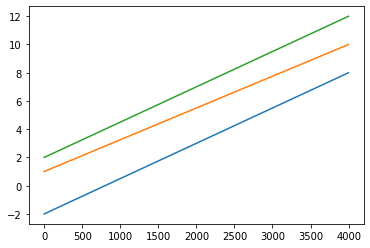

In [14]:
plt.plot(range(len(X)),X[:,0])
plt.plot(range(len(X)),X[:,1])
plt.plot(range(len(X)),X[:,2])

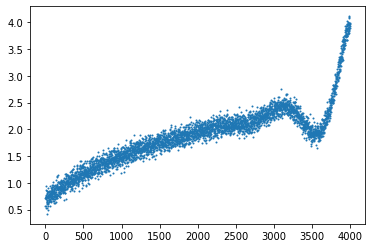

In [16]:
plt.plot(y, 'o', markersize=1)

## Tworzenie modelu

In [27]:
model = Sequential()

model.add(Dense(units=3, activation='relu', input_dim=3))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=1, activation='relu'))

model.compile(optimizer='adam', loss='mape', metrics=['mse'])

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 3)                 12        
                                                                 
 dense_9 (Dense)             (None, 2)                 8         
                                                                 
 dense_10 (Dense)            (None, 1)                 3         
                                                                 
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(x=X_train, y=y_train, batch_size=32, epochs=5) # 2x5 10

Epoch 1/5
100/100 [==============================] - 0s 905us/step - loss: 8.1341 - mse: 0.0838
Epoch 2/5
100/100 [==============================] - 0s 1ms/step - loss: 8.0204 - mse: 0.0838
Epoch 3/5
100/100 [==============================] - 0s 935us/step - loss: 8.0085 - mse: 0.0813
Epoch 4/5
100/100 [==============================] - 0s 1ms/step - loss: 7.8854 - mse: 0.0800
Epoch 5/5
100/100 [==============================] - 0s 1ms/step - loss: 7.8783 - mse: 0.0795


In [30]:
model.evaluate(x=X_test, y=y_test)

25/25 [==============================] - 0s 706us/step - loss: 7.6721 - mse: 0.0872


[7.672079086303711, 0.08719553053379059]

In [31]:
y_pred = model.predict(x=X_test)

In [36]:
model.save('model_do_projektu')

INFO:tensorflow:Assets written to: model_do_projektu\assets
